In [247]:
import pandas as pd
import warnings
warnings.filterwarnings( 'ignore' )
import os

In [ ]:
os.listdir('./data/교통량')

In [63]:
df = pd.DataFrame()
for name in os.listdir('./data/교통량'):
    a = pd.read_csv(f'./data/교통량/{name}',encoding='ANSI')
    df = pd.concat([df,a])

In [82]:
df.reset_index(drop=True,inplace=True)

In [85]:
for i in range(len(df)):
    if '창원' in df.iloc[i]['기초지자체']:
        df.loc[i,'기초지자체'] = '창원시'

In [90]:
df.to_csv('./data/visitor_info.csv',encoding='utf-8',index=False)

In [127]:
r = df.groupby('기초지자체').sum('방문자 수').sort_values('방문자 수',ascending=False)[['방문자 수']][:15]

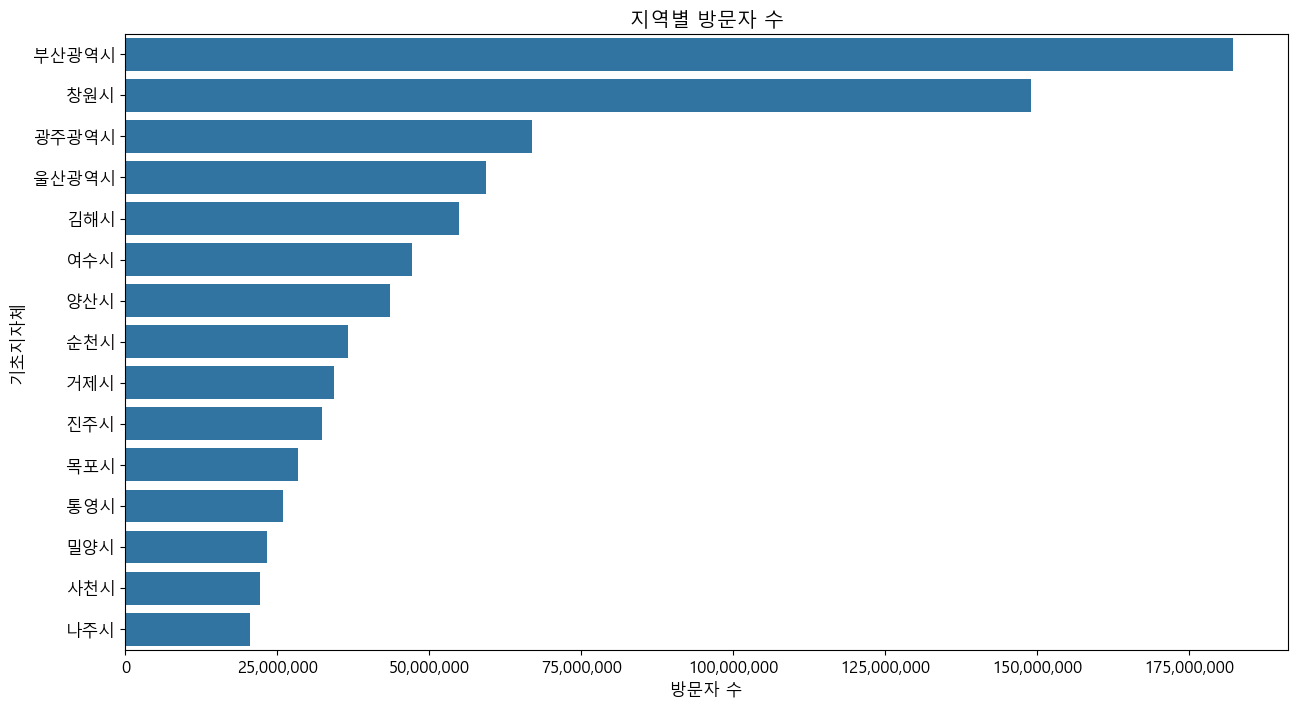

In [139]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.rc('font', family='Malgun Gothic',size=12)

plt.figure(figsize=(15,8))
ax = sns.barplot(
    data = r,
    x = '방문자 수',
    y = r.index
)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
_=plt.title('지역별 방문자 수')

In [142]:
basic_info = pd.read_csv('./부산/basic_info.csv')
navi_info = pd.read_csv('./부산/navi_info.csv')
visit_info = pd.read_csv('./부산/visit_info.csv')
location_info = pd.read_csv('./부산/location_info.csv')

In [159]:
basic_info.drop(['stars','reviews','search_number','catch','description'],axis=1)

,관광지명,주소,평균 체류시간,광역지자체별 거주 방문자 비율
0,명지동근린공원,부산광역시 강서구,164,62.5
1,칠암항,부산광역시 기장군,73,53.6
2,학리항,부산광역시 기장군,88,56.6
3,아미르공원,부산광역시 영도구,154,53.0
4,부산복천동고분군,부산광역시 동래구,183,74.3
...,...,...,...,...
235,광복로문화패션거리,부산광역시 중구,75,69.8
236,송정역,부산광역시 해운대구,84,47.7
237,부산자갈치양곱창골목,부산광역시 중구,67,70.0
238,화전공원,부산광역시 강서구,173,55.1


In [160]:
navi_info

,관광지명,202301,202302,202303,202304,202305,202306,202307,202308,202309,202310,202311,202312
0,168계단,26.0,30.0,23.0,12.0,14.0,15.0,25.0,12.0,3.0,16.0,14.0,13.0
1,40계단문화관광테마거리,16.0,31.0,33.0,29.0,29.0,6.0,29.0,16.0,40.0,35.0,59.0,29.0
2,BIFF광장,398.0,397.0,278.0,279.0,279.0,29.0,8.0,112.0,321.0,444.0,327.0,480.0
3,KT&G상상마당부산,1402.0,1185.0,928.0,1094.0,1642.0,3050.0,3621.0,3813.0,2545.0,2042.0,1438.0,1944.0
4,SEALIFE부산아쿠아리움,4067.0,4155.0,2768.0,3603.0,5161.0,3709.0,5612.0,6673.0,3656.0,3148.0,2701.0,4588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,화명수목원,602.0,766.0,1340.0,1791.0,1541.0,1555.0,1003.0,997.0,1136.0,1992.0,1923.0,664.0
235,화전공원,32.0,38.0,25.0,29.0,29.0,19.0,29.0,22.0,24.0,34.0,50.0,22.0
236,황령산,425.0,416.0,569.0,373.0,373.0,66.0,22.0,148.0,500.0,608.0,527.0,449.0
237,황령산전망대,2587.0,2303.0,3700.0,3144.0,2447.0,2670.0,2464.0,3278.0,3297.0,3826.0,3130.0,2780.0


In [162]:
location_info = location_info.rename(columns={'CONT_NM': '관광지명', 'TAR_ADDR_NM': '주소', 'KTO_CATE_LCLS_NM': '대분류', 'KTO_CATE_MCLS_NM': '중분류', 'KTO_CATE_SCLS_NM': '소분류', 'XCRD' : 'longitude', 'YCRD' : 'latitude'})

In [163]:
location_info

,관광지명,주소,대분류,중분류,소분류,longitude,latitude
0,168계단,부산광역시 동구 영초길191번길 10-2,인문(문화/예술/역사),체험관광지,이색거리,129.035364,35.117130
1,40계단문화관광테마거리,부산광역시 중구 중앙동4가,인문(문화/예술/역사),체험관광지,이색거리,129.035412,35.104070
2,BIFF광장,부산광역시 중구 비프광장로 36,인문(문화/예술/역사),체험관광지,이색거리,129.029213,35.098851
3,KT&G상상마당부산,부산광역시 부산진구 서면로 39,인문(문화/예술/역사),체험관광지,이색체험,129.057331,35.154317
4,SEALIFE부산아쿠아리움,부산광역시 해운대구 해운대해변로 266,인문(문화/예술/역사),문화시설,전시관,129.161033,35.159197
...,...,...,...,...,...,...,...
234,화명수목원,부산광역시 북구 산성로 299 부산광역시 화명수목원관리사업소,자연,자연관광지,수목원,129.042677,35.251054
235,화전공원,부산광역시 강서구 화전산단5로 84,인문(문화/예술/역사),휴양관광지,공원,128.879162,35.105656
236,황령산,부산광역시 연제구 연산5동,자연,자연관광지,산,129.082729,35.157934
237,황령산전망대,부산광역시 남구 황령산로 391-39,인문(문화/예술/역사),건축/조형물,기념탑/기념비/전망대,129.082729,35.157934


In [169]:
basic_info.drop(['catch','description'],axis=1).sort_values(by='관광지명').reset_index(drop=True)

,관광지명,주소,평균 체류시간,stars,reviews,search_number,광역지자체별 거주 방문자 비율
0,168계단,부산광역시 동구,184,4.2,1948.0,253000,72.7
1,40계단문화관광테마거리,부산광역시 중구,96,3.8,1705.0,134000,79.1
2,BIFF광장,부산광역시 중구,82,4.1,17771.0,107000,70.9
3,KT&G상상마당부산,부산광역시 부산진구,88,4.5,280.0,293000,63.7
4,SEALIFE부산아쿠아리움,부산광역시 해운대구,59,4.2,8067.0,76200,21.7
...,...,...,...,...,...,...,...
235,화명수목원,부산광역시 북구,68,4.4,1282.0,245000,74.7
236,화전공원,부산광역시 강서구,173,NaN,NaN,176000,55.1
237,황령산,부산광역시 부산진구,121,5.0,5.0,249000,72.4
238,황령산전망대,부산광역시 남구,38,4.6,3512.0,118000,66.1


In [170]:
bus_info = pd.read_csv('./부산/bus_info.csv')

In [176]:
bus_info[:10]

,관광지명,총 승객수,노선,구분,total_time,walking_time,fare,bus_time,subway_time,transfer
0,문화공감수정,42175,29,일반 명소,13,9,1550,4,0,0
1,연동시장,18510,6,숨은 명소,36,11,1550,9,16,1
2,구포어린이교통공원,8867,4,숨은 명소,48,12,1650,0,34,1
3,구덕민속예술관,28469,5,숨은 명소,20,10,1550,10,0,0
4,국제시장,20706,2,일반 명소,17,9,1550,9,0,0
5,만덕고개누리길전망데크,842,1,숨은 명소,78,47,1650,9,22,2
6,광복로문화패션거리,166341,27,일반 명소,19,8,1550,10,0,0
7,대저수문생태공원,96,1,숨은 명소,82,32,1650,6,40,2
8,외양포포진지,460,1,숨은 명소,111,29,2100,38,22,2
9,더베이101,9280,4,일반 명소,52,17,1550,17,18,1


In [246]:
all_df = pd.read_csv('./data/all_df.csv')

## 부산 투어노선

In [154]:
busan = ['부산역', '우암동도시숲', '재한유엔기념공원', '삼익비치수변공원', '황령산', '연동시장', '한국기독교선교박물관', '만덕고개누리길전망데크', '우장춘기념관', '부산복천동고분군', '부산충렬사', '벡스코', '센텀APEC나루공원', '광안대교', '평화공원', '부산항대교', '부산역']

In [155]:
for i in busan:
    if i not in all_df['관광지명'].tolist():
        print(i)

부산역
광안대교
부산항대교
부산역


In [163]:
a = all_df[all_df['관광지명'].isin(busan)].reset_index(drop=True)

In [175]:
a.loc[13,'관광지명'] = '부산역'
a.loc[13,'latitude'] = 35.114495
a.loc[13,'longitude'] = 129.03933

a.loc[14,'관광지명'] = '광안대교'
a.loc[14,'latitude'] = 35.147551
a.loc[14,'longitude'] = 129.1302088

a.loc[15,'관광지명'] = '부산항대교'
a.loc[15,'latitude'] = 35.1037587
a.loc[15,'longitude'] = 129.0630537

In [185]:
for i,name in enumerate(busan[:-1]):
    for j in range(len(a)):
        if a.iloc[j]['관광지명'] == name:
            a.loc[j,'new_index'] = i
            break

In [223]:
a = a.set_index('new_index').sort_values(by='new_index')

In [240]:
a.to_csv('./pages/data/busan_tour.csv',index=False,encoding='utf-8')

## 울산 투어노선

In [270]:
ulsan = ['울산역', '두현저수지', '회야댐생태공원', '장생포고래박물관', '대송농수산물시장', '방어진항', '주전봉수대', '주전몽돌해변', '어물동마애여래좌상', '약사동제방유적전시관', '함월루', '구강서원', '울산큰애기집/이팔청춘사진관', '고복수음악관', '태화강동굴피아', '울산역']

In [271]:
for i in ulsan:
    if i not in all_df['관광지명'].tolist():
        print(i)

울산역
울산역


In [272]:
b = all_df[all_df['관광지명'].isin(ulsan)].reset_index(drop=True)

In [273]:
b.loc[14,'관광지명'] = '울산역'
b.loc[14,'latitude'] = 35.5513565
b.loc[14,'longitude'] = 129.1389365

In [288]:
for i,name in enumerate(ulsan[:-1]):
    for j in range(len(b)):
        if b.iloc[j]['관광지명'] == name:
            b.loc[j,'new_index'] = i
            break

In [290]:
b = b.set_index('new_index').sort_values(by='new_index')

In [292]:
b.to_csv('./pages/data/ulsan_tour.csv',index=False,encoding='utf-8')

## 경남 투어노선

In [356]:
gyeongnam = ['창원역', '사화공원', '명서전통시장', '창원봉곡시장', '창원역사민속관', '창원성산패총', '안민고개', '창원편백치유의숲', '장복산조각공원', '가포수변공원', '월영대', '부림시장먹자골목', '오동동통술거리', '산호공원', '창원역']

In [357]:
for i in gyeongnam:
    if i not in all_df['관광지명'].tolist():
        print(i)

창원역
창원역


In [358]:
c = all_df[all_df['관광지명'].isin(gyeongnam)].reset_index(drop=True)

In [359]:
c.loc[13,'관광지명'] = '창원역'
c.loc[13,'latitude'] = 35.2574358
c.loc[13,'longitude'] = 128.6066796

In [360]:
for i,name in enumerate(gyeongnam[:-1]):
    for j in range(len(c)):
        if c.iloc[j]['관광지명'] == name:
            c.loc[j,'new_index'] = i
            break

In [361]:
c = c.set_index('new_index').sort_values(by='new_index')

In [336]:
c.to_csv('./pages/data/gyeongnam_tour.csv',index=False,encoding='utf-8')

## 전남 투어노선

In [371]:
jeonnam = ['여수EXPO역', '만성리검은모래해변', '여수녹테마레', '미평산림욕장', '여수충민사', '여수타루비', '국동항', '돌산도', '은적사(여수)', '돌산항', '봉황산자연휴양림(여수봉황산자연휴양림)', '두문포(죽포항)', '전라남도해양수산과학관', '여수EXPO역']

In [372]:
for i in jeonnam:
    if i not in all_df['관광지명'].tolist():
        print(i)

여수EXPO역
여수EXPO역


In [373]:
d = all_df[all_df['관광지명'].isin(jeonnam)].reset_index(drop=True)

In [375]:
d.loc[12,'관광지명'] = '여수EXPO역'
d.loc[12,'latitude'] = 34.753187
d.loc[12,'longitude'] = 127.748971

In [376]:
for i,name in enumerate(jeonnam[:-1]):
    for j in range(len(d)):
        if d.iloc[j]['관광지명'] == name:
            d.loc[j,'new_index'] = i
            break

In [377]:
d = d.set_index('new_index').sort_values(by='new_index')

In [379]:
d.to_csv('./pages/data/jeonnam_tour.csv',index=False,encoding='utf-8')

## 광주 투어노선

In [391]:
gwangju = ['광주역', '원각사(광주)', '5·18민주화운동기록관', '전일빌딩245', '국립아시아문화전당', '남광주시장', '사직공원전망타워', '광주양동시장', '하정웅미술관(광주)', '운천저수지', '김대중컨벤션센터', '1913송정역시장', '무각사', '5·18기념공원', '중외공원', '광주비엔날레전시관', '광주역']

In [392]:
for i in gwangju:
    if i not in all_df['관광지명'].tolist():
        print(i)

광주역
광주역


In [393]:
e = all_df[all_df['관광지명'].isin(gwangju)].reset_index(drop=True)

In [394]:
e.loc[15,'관광지명'] = '광주역'
e.loc[15,'latitude'] = 35.1653428
e.loc[15,'longitude'] = 126.9092003

In [398]:
for i,name in enumerate(gwangju[:-1]):
    for j in range(len(e)):
        if e.iloc[j]['관광지명'] == name:
            e.loc[j,'new_index'] = i
            break

In [400]:
e = e.set_index('new_index').sort_values(by='new_index')

In [402]:
e.to_csv('./pages/data/gwangju_tour.csv',index=False,encoding='utf-8')

In [234]:
ab = []
for i,row in a.iterrows():
    ab.append([row['latitude'],row['longitude']])
ab.append(ab[0])

In [235]:
import folium

busan_map = folium.Map(location=[35.115225,129.042243],zoom_start=11)

In [238]:
for i in range(len(a)):
    folium.Marker(
            [a.iloc[i]['latitude'],a.iloc[i]['longitude']],
            popup=folium.Popup(a.iloc[i]['관광지명'],maxWidth=300),
            fill_opacity=0.5,
            icon=folium.Icon(color='blue')            
            ).add_to(busan_map)

In [236]:
folium.PolyLine(locations=ab,tooltip='Polyline').add_to(busan_map)

In [239]:
busan_map

In [245]:
a.to_dict()

{'관광지명': {0: '부산역',
  1: '우암동도시숲',
  2: '재한유엔기념공원',
  3: '삼익비치수변공원',
  4: '황령산',
  5: '연동시장',
  6: '한국기독교선교박물관',
  7: '만덕고개누리길전망데크',
  8: '우장춘기념관',
  9: '부산복천동고분군',
  10: '부산충렬사',
  11: '벡스코',
  12: '센텀APEC나루공원',
  13: '광안대교',
  14: '평화공원',
  15: '부산항대교'},
 '평균 체류시간': {0: nan,
  1: 123.0,
  2: 128.0,
  3: 33.0,
  4: 121.0,
  5: 133.0,
  6: 73.0,
  7: 36.0,
  8: 49.0,
  9: 183.0,
  10: 114.0,
  11: 97.0,
  12: 55.0,
  13: nan,
  14: 98.0,
  15: nan},
 'stars': {0: nan,
  1: 4.4,
  2: 4.7,
  3: 5.0,
  4: 5.0,
  5: 4.2,
  6: 5.0,
  7: 4.4,
  8: 4.1,
  9: 4.0,
  10: 4.4,
  11: 4.3,
  12: 4.5,
  13: nan,
  14: 4.5,
  15: nan},
 'reviews': {0: nan,
  1: 306.0,
  2: 193.0,
  3: 3.0,
  4: 5.0,
  5: 5.0,
  6: 1.0,
  7: 197.0,
  8: 59.0,
  9: 1.0,
  10: 52.0,
  11: 8364.0,
  12: 1121.0,
  13: nan,
  14: 1238.0,
  15: nan},
 '광역지자체별 거주 방문자 비율': {0: nan,
  1: 67.5,
  2: 69.3,
  3: 43.0,
  4: 72.4,
  5: 78.5,
  6: 78.8,
  7: 84.0,
  8: 60.3,
  9: 74.3,
  10: 80.9,
  11: 61.0,
  12: 60.2,
  13: nan,

In [3]:
busan = pd.read_csv('./busan.csv')
ulsan = pd.read_csv('./ulsan.csv')
gyeongnam = pd.read_csv('./gyeongnam.csv')
jeonnam = pd.read_csv('./jeonnam.csv')
gwangju = pd.read_csv('./gwangju.csv')

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt

<Axes: xlabel='scores', ylabel='Count'>

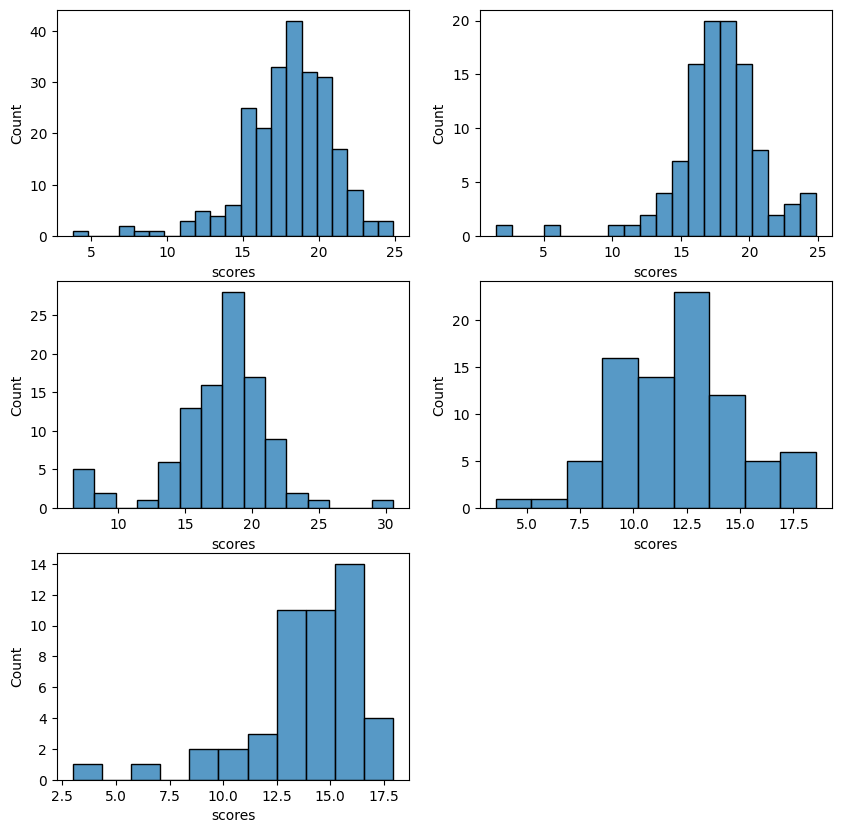

In [55]:
# 점수 분포 파악
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
sns.histplot(busan['scores'])

plt.subplot(3,2,2)
sns.histplot(ulsan['scores'])

plt.subplot(3,2,3)
sns.histplot(gyeongnam['scores'])

plt.subplot(3,2,4)
sns.histplot(jeonnam['scores'])

plt.subplot(3,2,5)
sns.histplot(gwangju['scores'])

In [56]:
# 점수 평균 파악
busan_avg = busan['scores'].sum() / len(busan)
ulsan_avg = ulsan['scores'].sum() / len(ulsan)
gyeongnam_avg = gyeongnam['scores'].sum() / len(gyeongnam)
jeonnam_avg = jeonnam['scores'].sum() / len(jeonnam)
gwangju_avg = gwangju['scores'].sum() / len(gwangju)

In [59]:
# 관광지 비율 파악
print('부산 : ',len(busan[busan['scores'] >= busan_avg]) / len(busan))
print('울산 : ',len(ulsan[ulsan['scores'] >= ulsan_avg]) / len(ulsan))
print('경남 : ',len(gyeongnam[gyeongnam['scores'] >= gyeongnam_avg]) / len(gyeongnam))
print('전남 : ',len(jeonnam[jeonnam['scores'] >= jeonnam_avg]) / len(jeonnam))
print('광주 : ',len(gwangju[gwangju['scores'] >= gwangju_avg]) / len(gwangju))

부산 :  0.5481171548117155
울산 :  0.5283018867924528
경남 :  0.5841584158415841
전남 :  0.5180722891566265
광주 :  0.5918367346938775


In [61]:
# 관광지 수 파악
print('부산 : ',len(busan[busan['scores'] >= busan_avg]))
print('울산 : ',len(ulsan[ulsan['scores'] >= ulsan_avg]))
print('경남 : ',len(gyeongnam[gyeongnam['scores'] >= gyeongnam_avg]))
print('전남 : ',len(jeonnam[jeonnam['scores'] >= jeonnam_avg]))
print('광주 : ',len(gwangju[gwangju['scores'] >= gwangju_avg]))

부산 :  131
울산 :  56
경남 :  59
전남 :  43
광주 :  29
